In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix



import os
for dirname, _, filenames in os.walk('/content/global_ads_performance_messy.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/content/global_ads_performance_messy.csv')

In [170]:
display(df.head(11))

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,NaN,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39
5,2024-10-15,TikTok Ads,Search,Fintech,Canada,17666,724,0.0410,0.37,267880.00,23,11.65,5220.85,19.49
6,2024-08-14,Meta Ads,Video,Fintech,US,118252,3748,0.0317,0.42,1574.16,152,10.36,12838.56,8.16
7,2024-04-05,TikTok Ads,Search,EdTech,UAE,92939,5176,0.0557,0.66,3416.16,388,8.80,96298.69,28.19
8,2024-04-17,Meta Ads,Display,EdTech,Germany,30939,937,0.0303,0.59,552.83,63,8.78,16531.03,29.90
9,2024-11-13,Google Ads,Shopping,Fintech,USA,8748,362,0.0414,1.21,438.02,10,43.80,966.57,2.21


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1710 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1746 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


In [172]:
# check for missing value
df.isnull().sum()

,0
date,0
platform,0
campaign_type,0
industry,90
country,0
impressions,0
clicks,0
CTR,0
CPC,0
ad_spend,0


In [173]:
import pandas as pd
import numpy as np

df = pd.read_csv('global_ads_performance_messy.csv')

print(f"Initial number of rows: {df.shape[0]}\n")

df['platform'] = df['platform'].replace({'Google': 'Google Ads', 'google ads': 'Google Ads'})
df['country'] = df['country'].replace({'US': 'USA'})

print("1. Standardized inconsistent text: 'Google', 'google ads' -> 'Google Ads', 'US' -> 'USA'")

invalid_clicks_count = len(df[df['clicks'] > df['impressions']])
df = df[df['clicks'] <= df['impressions']]
print(f"2.1 Removed {invalid_clicks_count} rows where Clicks > Impressions (Logical Error)")

invalid_rev_count = len(df[df['revenue'] < 0])
df['revenue'] = df['revenue'].abs()
print(f"2.2 Converted {invalid_rev_count} negative revenue entries to absolute (positive) values")

missing_industry = df['industry'].isna().sum()
df['industry'] = df['industry'].fillna('Unknown')
print(f"3.1 Imputed {missing_industry} missing 'industry' values with 'Unknown'")

missing_revenue = df['revenue'].isna().sum()
df = df.dropna(subset=['revenue'])
print(f"3.2 Dropped {missing_revenue} rows with missing 'revenue' data")


def drop_extreme_outliers(data, column, multiplier=3.0):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (multiplier * IQR)

    outliers_count = len(data[data[column] > upper_bound])
    data = data[data[column] <= upper_bound]
    return data, outliers_count

df, roas_outliers = drop_extreme_outliers(df, 'ROAS')
print(f"4.1 Removed {roas_outliers} Extreme Outliers from the 'ROAS' column")

df, spend_outliers = drop_extreme_outliers(df, 'ad_spend')
print(f"4.2 Removed {spend_outliers} Extreme Outliers from the 'ad_spend' column")

print(f"\nFinal number of rows: {df.shape[0]} (Removed {1800 - df.shape[0]} rows total)")
print("Remaining Missing Values Check:")
print(df.isnull().sum()[:3])

df.to_csv('global_ads_performance_cleaned.csv', index=False)
print("\nSuccessfully saved 'global_ads_performance_cleaned.csv'!")

Initial number of rows: 1800

1. Standardized inconsistent text: 'Google', 'google ads' -> 'Google Ads', 'US' -> 'USA'
2.1 Removed 15 rows where Clicks > Impressions (Logical Error)
2.2 Converted 5 negative revenue entries to absolute (positive) values
3.1 Imputed 88 missing 'industry' values with 'Unknown'
3.2 Dropped 52 rows with missing 'revenue' data
4.1 Removed 56 Extreme Outliers from the 'ROAS' column
4.2 Removed 13 Extreme Outliers from the 'ad_spend' column

Final number of rows: 1664 (Removed 136 rows total)
Remaining Missing Values Check:
date             0
platform         0
campaign_type    0
dtype: int64

Successfully saved 'global_ads_performance_cleaned.csv'!


In [174]:
# after cleaning
df.isnull().sum()

,0
date,0
platform,0
campaign_type,0
industry,0
country,0
impressions,0
clicks,0
CTR,0
CPC,0
ad_spend,0


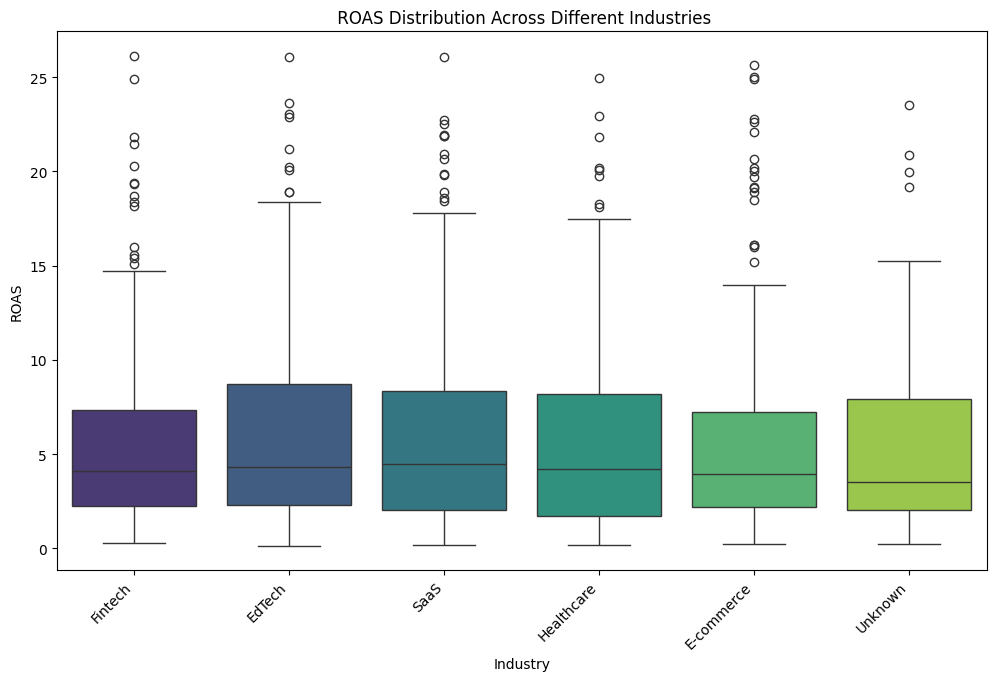

In [175]:
fig = plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='industry', y='ROAS', palette='viridis', legend=False)
plt.title(f' ROAS Distribution Across Different Industries')
plt.xlabel('Industry')
plt.ylabel('ROAS')
plt.xticks(rotation=45, ha='right')
plt.show()

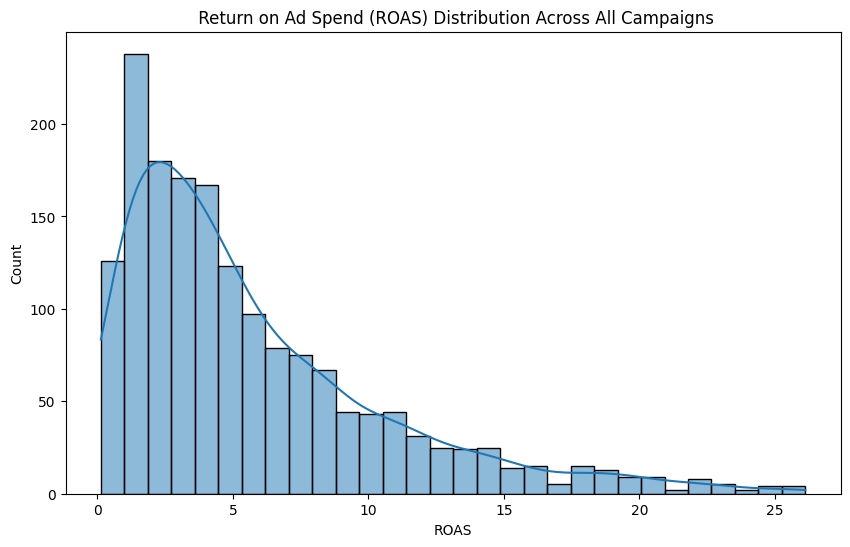

In [176]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['ROAS'], bins=30, kde=True)
plt.title(f' Return on Ad Spend (ROAS) Distribution Across All Campaigns')
plt.show()


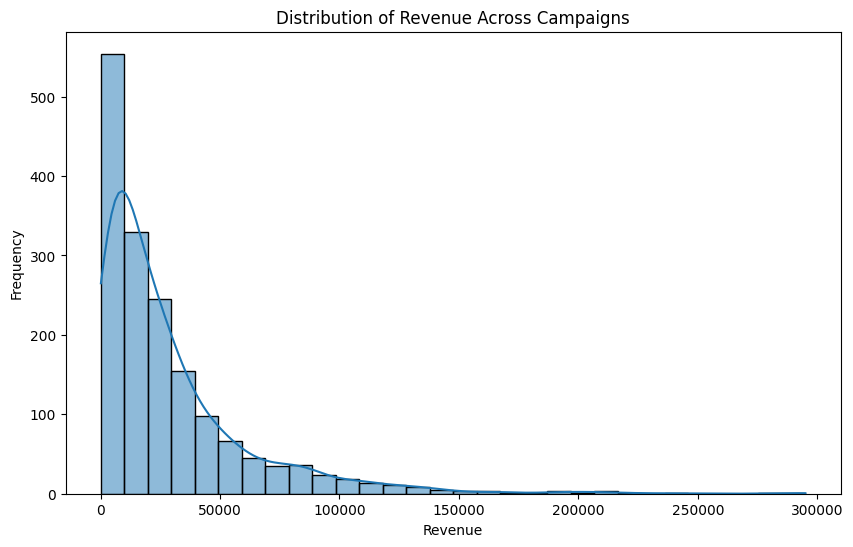

In [177]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Distribution of Revenue Across Campaigns')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

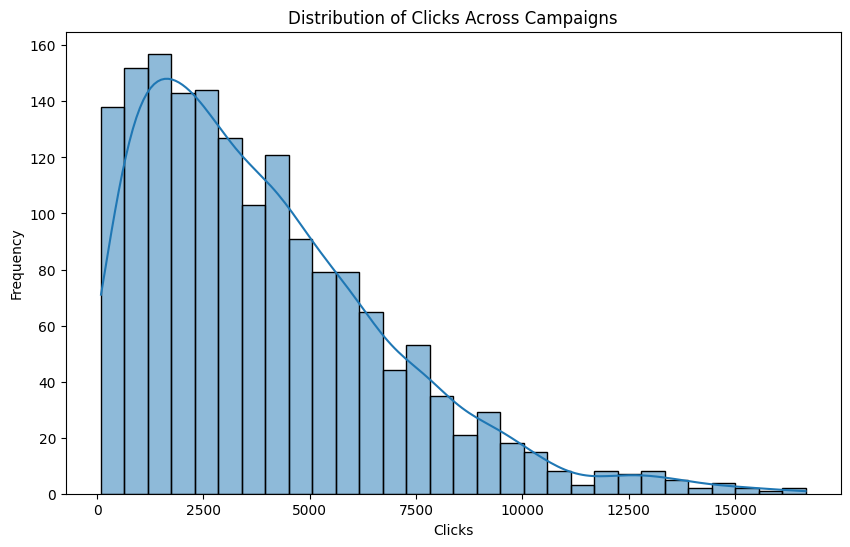

In [178]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks Across Campaigns')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

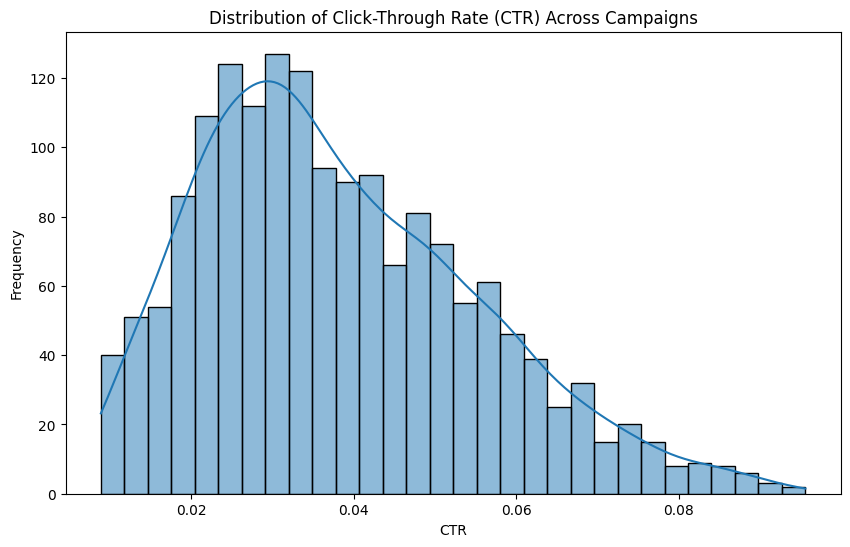

In [179]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['CTR'], bins=30, kde=True)
plt.title('Distribution of Click-Through Rate (CTR) Across Campaigns')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()

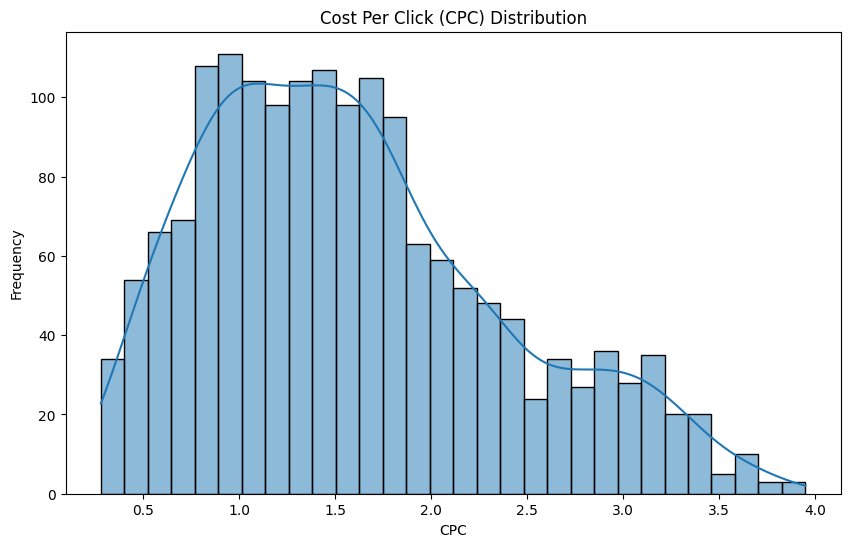

In [180]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['CPC'], bins=30, kde=True)
plt.title('Cost Per Click (CPC) Distribution')
plt.xlabel('CPC')
plt.ylabel('Frequency')
plt.show()

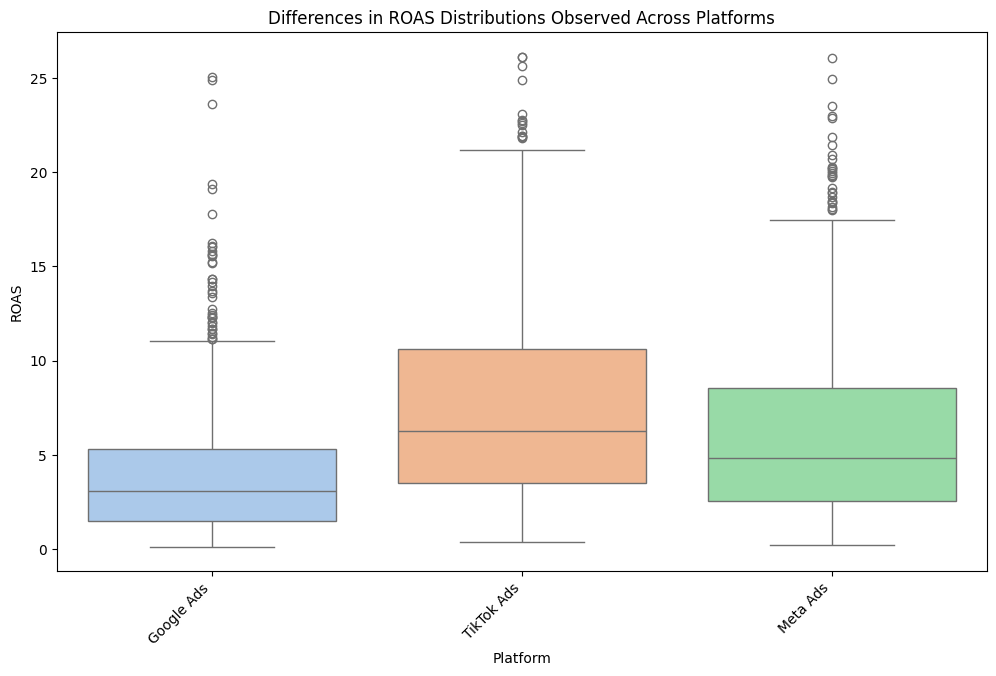

In [181]:
fig = plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='platform', y='ROAS', hue='platform', palette='pastel', legend=False)
plt.title('Differences in ROAS Distributions Observed Across Platforms')
plt.xlabel('Platform')
plt.ylabel('ROAS')
plt.xticks(rotation=45, ha='right')
plt.show()

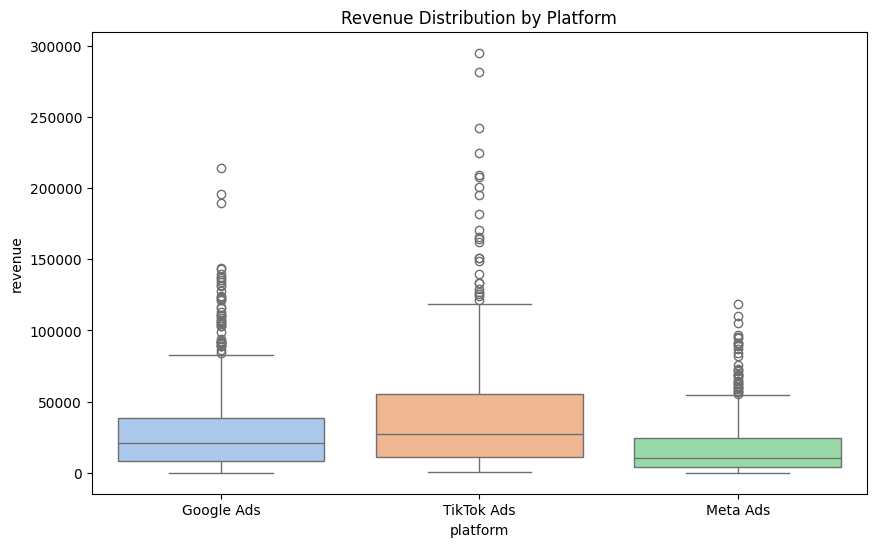

In [182]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='platform', y='revenue',palette='pastel')
plt.title(f'Revenue Distribution by Platform')
plt.show()


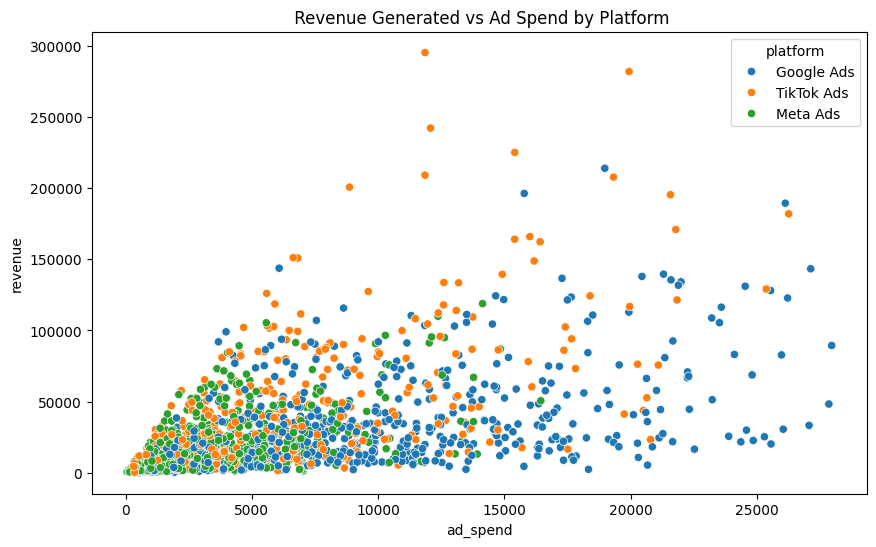

In [183]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ad_spend', y='revenue', hue='platform')
plt.title(f' Revenue Generated vs Ad Spend by Platform')
plt.show()


In [184]:
df.tail()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
1795,2024-07-11,TikTok Ads,Video,E-commerce,Germany,180128,10555,0.0586,0.84,8866.20,707,12.54,200566.90,22.62
1796,2024-06-23,Meta Ads,Display,EdTech,Australia,169849,5927,0.0349,0.94,5571.38,437,12.75,105321.92,18.90
1797,2024-03-01,Meta Ads,Video,Fintech,Australia,122974,2939,0.0239,1.85,5437.15,91,59.75,26004.98,4.78
1798,2024-08-02,Google Ads,Search,E-commerce,USA,28553,850,0.0298,2.06,1751.00,51,34.33,13010.72,7.43
1799,2024-01-29,Meta Ads,Display,EdTech,UK,77447,906,0.0117,1.15,1041.90,29,35.93,8284.13,7.95


In [185]:
df.shape

(1664, 14)

In [186]:
df.columns

Index(['date', 'platform', 'campaign_type', 'industry', 'country',
       'impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA',
       'revenue', 'ROAS'],
      dtype='object')

In [187]:
df.dtypes

,0
date,object
platform,object
campaign_type,object
industry,object
country,object
impressions,int64
clicks,int64
CTR,float64
CPC,float64
ad_spend,float64


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1664 non-null   object 
 1   platform       1664 non-null   object 
 2   campaign_type  1664 non-null   object 
 3   industry       1664 non-null   object 
 4   country        1664 non-null   object 
 5   impressions    1664 non-null   int64  
 6   clicks         1664 non-null   int64  
 7   CTR            1664 non-null   float64
 8   CPC            1664 non-null   float64
 9   ad_spend       1664 non-null   float64
 10  conversions    1664 non-null   int64  
 11  CPA            1664 non-null   float64
 12  revenue        1664 non-null   float64
 13  ROAS           1664 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 195.0+ KB


In [189]:
missing_rate = 0.05


numerical_cols = ['impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA', 'revenue', 'ROAS']

for col in numerical_cols:

    mask = np.random.rand(len(df)) < missing_rate
    df.loc[mask, col] = np.nan

print("Missing values after introduction:")
print(df.isnull().sum())

Missing values after introduction:
date               0
platform           0
campaign_type      0
industry           0
country            0
impressions       94
clicks            88
CTR               71
CPC               95
ad_spend          91
conversions      101
CPA               92
revenue           62
ROAS              96
dtype: int64


In [190]:
df.describe()

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1570.000000,1576.000000,1593.000000,1569.000000,1573.000000,1563.000000,1572.000000,1602.000000,1568.000000
mean,103037.233121,3914.586294,0.038055,1.595124,6108.939104,176.483685,47.563289,28572.762009,5.685153
std,56056.023670,2908.739716,0.017021,0.783221,5477.915721,170.818307,40.728496,32944.112255,4.865875
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.950000,142.690000,0.130000
25%,53906.500000,1676.000000,0.025000,1.000000,2011.280000,56.000000,21.522500,6976.827500,2.100000
50%,104295.000000,3285.000000,0.035000,1.480000,4436.880000,125.000000,34.425000,17904.585000,4.110000
75%,150758.000000,5550.250000,0.049100,2.060000,8552.850000,245.000000,57.362500,36579.460000,7.842500
max,199472.000000,16660.000000,0.095600,3.950000,27966.960000,1151.000000,335.860000,295028.260000,26.130000


In [191]:
df['profit_label'] = (df['ROAS'] >= 1).astype(int)

In [192]:

features = ['impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA', 'revenue']
target = 'profit_label'

df_clean = df.dropna(subset=features + [target])

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [195]:
y_pred = model.predict(X_test)

In [196]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(acc*100, 2), "%")

Model Accuracy: 85.39 %


In [197]:
import pandas as pd

print("=== 1. Categorical Variable Distributions ===")

platform_counts = df['platform'].value_counts()
platform_props = df['platform'].value_counts(normalize=True) * 100
print("\n[Platform Distribution]")
print(pd.concat([platform_counts, platform_props], axis=1, keys=['Count', 'Percentage (%)']))

campaign_counts = df['campaign_type'].value_counts()
campaign_props = df['campaign_type'].value_counts(normalize=True) * 100
print("\n[Campaign Type Distribution]")
print(pd.concat([campaign_counts, campaign_props], axis=1, keys=['Count', 'Percentage (%)']))


industry_props = df['industry'].value_counts(normalize=True) * 100
print("\n[Industry Distribution (%)]")
print(industry_props)

print("\n=== 2. Continuous Variable: ROAS ===")
roas_mean = df['ROAS'].mean()
roas_median = df['ROAS'].median()
Q1 = df['ROAS'].quantile(0.25)
Q3 = df['ROAS'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)

outliers = df[df['ROAS'] > upper_fence]

print(f"Mean: {roas_mean:.2f}")
print(f"Median: {roas_median:.2f}")
print(f"Skewness Check: {'Right-skewed' if roas_mean > roas_median else 'Left-skewed'} (Mean > Median)")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Upper Fence (Outlier Threshold): {upper_fence:.2f}")
print(f"Max ROAS Value: {df['ROAS'].max():.2f}")
print(f"Number of Outliers detected: {len(outliers)}")

print("\n=== 3. Continuous Variable: Ad Spend ===")
spend_mean = df['ad_spend'].mean()
spend_median = df['ad_spend'].median()

print(f"Mean Ad Spend: {spend_mean:,.2f}")
print(f"Median Ad Spend: {spend_median:,.2f}")

=== 1. Categorical Variable Distributions ===

[Platform Distribution]
            Count  Percentage (%)
platform                         
Google Ads    671       40.324519
Meta Ads      590       35.456731
TikTok Ads    403       24.218750

[Campaign Type Distribution]
               Count  Percentage (%)
campaign_type                       
Search           433       26.021635
Shopping         423       25.420673
Video            422       25.360577
Display          386       23.197115

[Industry Distribution (%)]
industry
EdTech        19.651442
SaaS          19.651442
Fintech       19.411058
E-commerce    18.689904
Healthcare    17.668269
Unknown        4.927885
Name: proportion, dtype: float64

=== 2. Continuous Variable: ROAS ===
Mean: 5.69
Median: 4.11
Skewness Check: Right-skewed (Mean > Median)
Q1: 2.10
Q3: 7.84
IQR: 5.74
Upper Fence (Outlier Threshold): 16.46
Max ROAS Value: 26.13
Number of Outliers detected: 68

=== 3. Continuous Variable: Ad Spend ===
Mean Ad Spend: 6,108.9